### **Introduction**

Hello! Thanks for visiting our code. We describe our method in our GitHub page. Without that, the following code will probably seem like gibberish. So please, check it out [here](https://github.com/AthanasiosPetsanis/Diploma_Clone) if you haven't already.

To see the code run, just hit  **"Runtime" --> "Run all"**

If you want to change the settings and redo it, just hit **"Runtime" --> "Disconnect and delete runtime"** and then **"Runtime" --> "Run all"**

### **Prerequisites**

#### **Reset gym to stable version**

Due to some recent updates, my code was unable to function and thus I reset the version of Gym, TextWorld, MiniGrid and other libraries to previous versions which work.
This also ensures that the Main.ipynb continues to run after future changes of the necessary libraries without my intervention. 

In [ ]:
!cd /usr/local/lib/python3.7/dist-packages/ && \
rm -rf gym && \
git clone https://github.com/openai/gym && \
cd /usr/local/lib/python3.7/dist-packages/gym && \
git reset --hard ca42b052437c13da3a84d06c3748033e24cd2d42 && \
cd /usr/local/lib/python3.7/dist-packages/ && \
mv gym/gym gym2 -v && \
rm -rf gym && \
mv gym2 gym -v

Cloning into 'gym'...
remote: Enumerating objects: 15991, done.
remote: Counting objects: 100% (258/258), done.
remote: Compressing objects: 100% (184/184), done.
remote: Total 15991 (delta 136), reused 139 (delta 73), pack-reused 15733
Receiving objects: 100% (15991/15991), 6.80 MiB | 10.74 MiB/s, done.
Resolving deltas: 100% (11156/11156), done.
HEAD is now at ca42b05 Fix importlib-metadata on Python 3.8 + bump ale-py (#2428)
renamed 'gym/gym' -> 'gym2'
renamed 'gym2' -> 'gym'


#### **TextWorld & related GitHub-files**

Here I install TextWorld and after cloning my repository which includes my written code, I move the TextWolrd related files to where they need to be.


In [ ]:
!pip install textworld ; \
cd /usr/local/lib/python3.7/dist-packages/ && \
rm -rf DiplomaClone -v ; \
rm -rf textworld/Created_Games -v ; \
rm -rf textworld/MyPy -v ; \
git clone https://github.com/AthanasiosPetsanis/DiplomaClone  && \
mv DiplomaClone/TextWorld/Created_Games textworld/ -v && \
mv DiplomaClone/TextWorld/MyPy textworld/ -v && \

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.7 MB 5.2 MB/s 
     |████████████████████████████████| 85 kB 3.7 MB/s 
     |████████████████████████████████| 1.2 MB 50.0 MB/s 
  Created wheel for jericho: filename=jericho-3.1.0-py3-none-any.whl size=333859 sha256=7b8f1b542606e58f72c5adff914eea2e1a9568688553486338009b938b9ccc8e
  Stored in directory: /root/.cache/pip/wheels/38/3f/1e/b279c7bb3ec04ceeb150611eb9c2eed35c7eb150132d14d4ac
Successfully built jericho
Cloning into 'Diploma_Clone'...
remote: Enumerating objects: 756, done.
remote: Counting objects: 100% (72/72), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 756 (delta 7), reused 64 (delta 5), pack-reused 684
Receiving objects: 100% (756/756), 14.99 MiB | 33.16 MiB/s, done.
Resolving deltas: 100% (254/254), done.
renamed 'Diploma_Clone/TextWorld/Created_Games' -> 'textworld/Created_Games'
renamed 'Diploma_Clone/Text

#### **Import Libraries**


After installation I also need to import my code. Importing the Q_agent.py code is enough since it consecutively imports the rest.


In [ ]:
# This imports all the necessary libraries from inside Q_agent.py
from textworld.MyPy.Q_agent import *
start = tic() # Start timer

### **Parameters**

In [ ]:
# env_names = ['Easy', 'Easy_2', 'Medium', 'Medium_2', 'Hard']
env_names = ['Easy']
algo = 'ppo'
graph_points = 300
frames = graph_points * 2048
recurrence = 8
action_courses = {}
user_inputs = {}

In [ ]:
# The environments to be tested 
envs = []
for env_name in env_names:
    envs.append('Sparse_' + env_name)
    envs.append('Dense_' + env_name)

# Define user-command as putting the 'apple' on the 'table' in the 'livingroom' for all levels
user_inputs['Easy'] = ['apple', 'livingroom', 'table']
user_inputs['Easy_2'] = ['apple', 'livingroom', 'table']
user_inputs['Medium'] = ['apple', 'livingroom', 'table']
user_inputs['Medium_2'] = ['apple', 'livingroom', 'table']
user_inputs['Hard'] = ['apple', 'livingroom', 'table']

### **TextWorld Training**

Here I train the high-level agent which takes as input the user-command and deduces the required sub-tasks to reach it for each level of difficulty.




                    ________  ________  __    __  ________        
                   |        \|        \|  \  |  \|        \       
                    \$$$$$$$$| $$$$$$$$| $$  | $$ \$$$$$$$$       
                      | $$   | $$__     \$$\/  $$   | $$          
                      | $$   | $$  \     >$$  $$    | $$          
                      | $$   | $$$$$    /  $$$$\    | $$          
                      | $$   | $$_____ |  $$ \$$\   | $$          
                      | $$   | $$     \| $$  | $$   | $$          
                       \$$    \$$$$$$$$ \$$   \$$    \$$          
              __       __   ______   _______   __        _______  
             |  \  _  |  \ /      \ |       \ |  \      |       \ 
             | $$ / \ | $$|  $$$$$$\| $$$$$$$\| $$      | $$$$$$$\
             | $$/  $\| $$| $$  | $$| $$__| $$| $$      | $$  | $$
             | $$  $$$\ $$| $$  | $$| $$    $$| $$      | $$  | $$
             | $$ $$\$$\$$| $$  | $$| $$$$$$$\| $$      | $

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


Training detected (3,) possible states
Number of commands for each state: 
[(1,), (2,), (1,)]


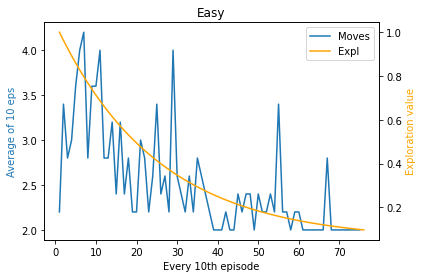

Training took 0.0 minutes and 37.0629825592041 seconds
S1: ['Livingroom', [], ['take apple']]
S2: ['Livingroom', ['apple.'], ['drop apple', 'put apple on table']]
S3: ['Livingroom', [], ['take apple from table']]
Action taken in step 1: take apple
Action taken in step 2: put apple on table
Finished in 2 moves
Actions taken:
take apple > put apple on table > Total TextWorld training took 0.0 minutes and 37.76483511924744 seconds


In [ ]:
# (Άλλαξα το reward σε 100 + 100/step)

for env_name in env_names:
    
    # Load env
    game_file = '/usr/local/lib/python3.7/dist-packages/textworld/Created_Games/' + env_name + '.ulx'
    env, obs, infos = load_game(game_file=game_file)

    # Make agent
    agent = Q_agent(env)

    # Train
    agent.reset()
    agent.train(max_epochs=5, max_eps=150, title=env_name, min_expl=0.05, expl_decay_rate=0.004,
                    gamma=0.5, user_input=user_inputs[env_name])

    # Test
    action_courses[env_name] = agent.test()

toc(start, 'Total TextWorld training') # End timer. This timed the total TextWolrd training

### **MiniGrid & related GitHub files**

Same as before, but now for MiniGrid

In [ ]:
# !cd /usr/local/lib/python3.7/dist-packages/ && \
# rm -rf DiplomaClone -v

# Clone rl-starter-files and reset to stable version
!cd /usr/local/lib/python3.7/dist-packages/ && \
git clone https://github.com/lcswillems/rl-starter-files ; \
cd /usr/local/lib/python3.7/dist-packages/rl-starter-files/ && \
git reset --hard e604b36915a13e25ac8a8a912f9a9a15e2d4a170
# pip3 install -r requirements.txt ; \

# Install minigrid and reset to stable version
!cd /usr/local/lib/python3.7/dist-packages/ && \
rm -rf gym-minigrid && \
git clone https://github.com/Farama-Foundation/gym-minigrid && \
cd /usr/local/lib/python3.7/dist-packages/gym-minigrid && \
git reset --hard bf4dbaabe6aa9224a37f9f7f55de251a8be92476 && \
cd /usr/local/lib/python3.7/dist-packages/ && \
rm -rf gym_minigrid && \
mv gym-minigrid/gym_minigrid . -v && \
rm -rf gym-minigrid

# Install torch-ac
!pip3 install torch-ac

# Install tensorboardX
!pip install tensorboardX

# Implement my environments and changes
!cd /usr/local/lib/python3.7/dist-packages/ && \
cp DiplomaClone/MiniGrid/__init__.py gym_minigrid/envs/ -v ; \
mv DiplomaClone/MiniGrid/__init__.py gym_minigrid/ -v ; \
mv DiplomaClone/MiniGrid/MyEnvs.py gym_minigrid/envs/ -v ; \
mv DiplomaClone/MiniGrid/minigrid.py gym_minigrid/ -v

Cloning into 'rl-starter-files'...
remote: Enumerating objects: 2670, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 2670 (delta 6), reused 11 (delta 4), pack-reused 2651
Receiving objects: 100% (2670/2670), 28.08 MiB | 13.98 MiB/s, done.
Resolving deltas: 100% (1612/1612), done.
HEAD is now at e604b36 Load status on correct device
Cloning into 'gym-minigrid'...
remote: Enumerating objects: 2799, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 2799 (delta 18), reused 20 (delta 9), pack-reused 2764
Receiving objects: 100% (2799/2799), 7.35 MiB | 24.52 MiB/s, done.
Resolving deltas: 100% (1988/1988), done.
HEAD is now at bf4dbaa Update roomgrid.py (#176)
renamed 'gym-minigrid/gym_minigrid' -> './gym_minigrid'
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, http

In [ ]:
!cd /usr/local/lib/python3.7/dist-packages/gym_minigrid && echo *

envs __init__.py minigrid.py register.py rendering.py roomgrid.py window.py wrappers.py


### **Preprocess**

In [ ]:
import pickle

def filter_actions(action_courses):
    rmv_actions = ['go east', 'go west', 'go north', 'go south']
    for action_course, actions_taken in action_courses.items():
        for sentence in actions_taken:
            if 'unlock' in sentence:
                action_courses[action_course].remove(sentence)
        action_courses[action_course] = list(filter(lambda action: action not in rmv_actions, actions_taken))
    return action_courses

def reset(envs):
    for env_name in envs:
        !cd /usr/local/lib/python3.7/dist-packages/rl-starter-files/storage && \
        rm -rf {env_name} -v

action_courses = filter_actions(action_courses)
print(action_courses)
# action_courses['Hard'] = ['take key', 'open door', 'open fridge', 'take apple from fridge', 'put apple on table']
# action_courses['Medium'] = ['open door', 'open fridge', 'take apple from fridge', 'put apple on table']
print(action_courses)

with open('/usr/local/lib/python3.7/dist-packages/rl-starter-files/storage/action_courses', 'wb') as fp:
    pickle.dump(action_courses, fp)

{'Easy': ['take apple', 'put apple on table']}
{'Easy': ['take apple', 'put apple on table']}


### **MiniGrid Training**

Time to train the home environment simulator (i.e. MiniGrid) agent. We do this both using the deduced sub-tasks from TextWorld and without them for comparison.

Notice that the only connection between MiniGrid and Textworld are the deduced sub-tasks saved in the variable **action_courses**.

In [ ]:
!cd /usr/local/lib/python3.7/dist-packages/gym_minigrid/envs/ && \
python3 MyEnvs.py

import time
reset(envs)
# envs = ['Dense_Hard']
for env_name in envs: 
    start = tic()
    env_dir = 'MiniGrid-' + env_name + '-v0'
    !cd /usr/local/lib/python3.7/dist-packages/rl-starter-files/ && \
    python3 -m scripts.train --algo {algo} --env {env_dir} --frames {frames} --model {env_name} --recurrence {recurrence}
    toc(start, env_name)

Traceback (most recent call last):
  File "MyEnvs.py", line 514, in <module>
    entry_point='gym_minigrid.envs.MyEnvs:Dense_Easy'
  File "/usr/local/lib/python3.7/dist-packages/gym_minigrid/register.py", line 11, in register
    assert id not in env_list
AssertionError
/usr/local/lib/python3.7/dist-packages/rl-starter-files/scripts/train.py --algo ppo --env MiniGrid-Sparse_Easy-v0 --frames 614400 --model Sparse_Easy --recurrence 8

Namespace(algo='ppo', batch_size=256, clip_eps=0.2, discount=0.99, entropy_coef=0.01, env='MiniGrid-Sparse_Easy-v0', epochs=4, frames=614400, frames_per_proc=None, gae_lambda=0.95, log_interval=1, lr=0.001, max_grad_norm=0.5, mem=True, model='Sparse_Easy', optim_alpha=0.99, optim_eps=1e-08, procs=16, recurrence=8, save_interval=10, seed=1, text=False, value_loss_coef=0.5)

Device: cpu

Environments loaded

Training status loaded

Observations preprocessor loaded
Model loaded

ACModel(
  (image_conv): Sequential(
    (0): Conv2d(3, 16, kernel_size=(2, 2), st

### Graphs

In [ ]:
import csv
import matplotlib.pyplot as plt

def data_extract(envs, data_label):

    storage_data = []
    new_dir_names = []
    
    for env_name in envs:
        file_name = '/usr/local/lib/python3.7/dist-packages/rl-starter-files/storage/' + env_name + '/log.csv'
        file = open(file_name)
        file = csv.reader(file)
        header = next(file)

        data = []
        for d in file:
            data.append(d)
        for i in range(len(header)):
            if header[i] == data_label: r_index = i

        data_hist = []
        for epoch in range(len(data)):
            sample = data[epoch][r_index]
            if sample != data_label:
                data_hist.append(round(float(sample), 5))
        
        storage_data.append(np.array(data_hist))
    return storage_data

data_rrmean = data_extract(envs, 'rreturn_mean')
data_rrstd = data_extract(envs, 'rreturn_std')
# data_rrmax = data_extract(envs, 'rreturn_max')
# data_rrmin = data_extract(envs, 'rreturn_min')


In [ ]:
print(np.shape(data_rrmean))
# print(np.shape(data_rrmax))
# print(np.shape(data_rrmin))
print(np.shape(data_rrstd))
print(type(data_rrstd[0]))
# print(data_rrstd[0])


(2, 300)
(2, 300)
<class 'numpy.ndarray'>


In [ ]:
# Simple Representation
def plotter(rrmean, rrstd):
    for i in np.arange(0,len(rrmean),2):

        # Find length of epochs (i.e. x-axis)
        x_len = np.shape(rrmean)[1]
        x = np.arange(0,x_len)

        # Find values of mean+std and mean-std for dense and sparse
        y_pos = np.add(rrmean[i], rrstd[i])
        y_neg = np.subtract(rrmean[i], rrstd[i])
        y_pos_ = np.add(rrmean[i+1], rrstd[i+1])
        y_neg_ = np.subtract(rrmean[i+1], rrstd[i+1])

        # Style properties
        fig = plt.figure(figsize=(6,4), edgecolor='black',dpi=100)
        title = env_names[int(i/2)]
        ax = fig.add_axes([0,0,1,1], projection='rectilinear',
        xlabel = 'Epochs',
        ylabel = 'Mean Return', title=title, facecolor='w')
        plt.style.use('seaborn')

        # Plot for Dense with blue
        plt.plot(rrmean[i], color='r', label='Sparse Rewarding')
        plt.plot(y_pos, color='r', alpha=0.06)
        plt.plot(y_neg, color='r', alpha=0.06)
        plt.fill_between(x, y_pos, y_neg, color='r', alpha=0.4)

        # Plot for Sparse with red
        plt.plot(rrmean[i+1], color='b', label='Dense Rewarding')
        plt.plot(y_pos_, color='b', alpha=0.06)
        plt.plot(y_neg_, color='b', alpha=0.06)
        plt.fill_between(x, y_pos_, y_neg_, color='royalblue', alpha=0.4)

        plt.legend()

['Sparse_Easy', 'Dense_Easy']


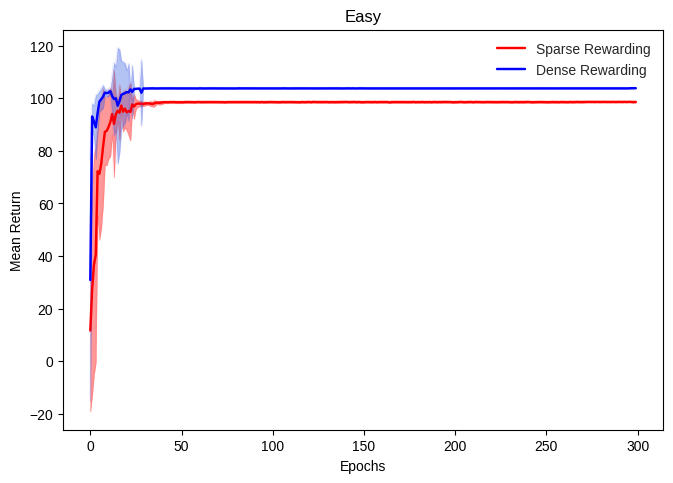

In [ ]:
# plotter(data_rrmean, data_rrmax, data_rrmin)
plotter(data_rrmean, data_rrstd)
print(envs)

In [ ]:
!cd /usr/local/lib/python3.7/dist-packages/rl-starter-files/storage/{env_name}/ && ls

events.out.tfevents.1661707798.be46da46a3cb  log.csv  log.txt  status.pt
